In [1]:
from theano.sandbox import cuda

Using gpu device 0: Tesla K80 (CNMeM is disabled)


In [2]:
%matplotlib inline
import utils_modified; reload(utils_modified)
from utils_modified import *
from __future__ import division, print_function

Using Theano backend.


In [3]:
import numpy as np
import random
import sys

In [4]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Embedding, Activation, LSTM, merge, Flatten, Dropout, Lambda
from keras.models import Model, Sequential
from keras.engine.topology import Merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers.convolutional import *
from keras.utils.data_utils import get_file

In [5]:
# https://keras.io/getting-started/sequential-model-guide/

In [6]:
look_back = 5
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

train = [math.sin(x*0.2) for x in range(250*3)]
train = np.array(train).reshape(-1,1)
trainX, trainY = create_dataset(train, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#print(trainX, trainY)
model.fit(trainX, trainY, nb_epoch=100, batch_size=50, verbose=1)

Epoch 1/100
744/744 [==============================] - 0s - loss: 0.3924     
Epoch 2/100
744/744 [==============================] - 0s - loss: 0.3662     
Epoch 3/100
744/744 [==============================] - 0s - loss: 0.3401     
Epoch 4/100
744/744 [==============================] - 0s - loss: 0.3139     
Epoch 5/100
744/744 [==============================] - 0s - loss: 0.2888     
Epoch 6/100
744/744 [==============================] - 0s - loss: 0.2635     
Epoch 7/100
744/744 [==============================] - 0s - loss: 0.2394     
Epoch 8/100
744/744 [==============================] - 0s - loss: 0.2172     
Epoch 9/100
744/744 [==============================] - 0s - loss: 0.1964     
Epoch 10/100
744/744 [==============================] - 0s - loss: 0.1780     
Epoch 11/100
744/744 [==============================] - 0s - loss: 0.1619     
Epoch 12/100
744/744 [==============================] - 0s - loss: 0.1477     
Epoch 13/100
744/744 [==============================] - 0s - 

In [8]:
lag = look_back

In [9]:
def show_top_next(mdl, inp, steps=1):
    inp = np.copy(inp)
    for k in range(steps):
        #ps = mdl.predict([np.array([i]) for i in inp])
        ps = mdl.predict(inp)
        newimp = np.concatenate((inp[0,:,:],ps), axis=1)
        inp[0,:,:] = newimp[:,1:]
    return inp

In [10]:
cut = 10
inps = [trainX[10:(cut+1),:,:], ]
for iter in range(8):
    inps.append( show_top_next(model, inps[-1], 5) )

print(inps[0])
print(inps[1])
print(inps[2])

[[[ 0.90929743  0.8084964   0.67546318  0.51550137  0.33498815]]]
[[[ 0.14971432 -0.0566142  -0.27141064 -0.47336614 -0.64913946]]]
[[[-0.79665715 -0.90304971 -0.96826339 -0.99756896 -0.98139274]]]


In [13]:
TSmodel = np.concatenate(inps, axis=2)[0,0]
TSreal = trainX[range(cut,cut+5*len(inps),5),:,:].reshape((1,1,-1))[0,0]

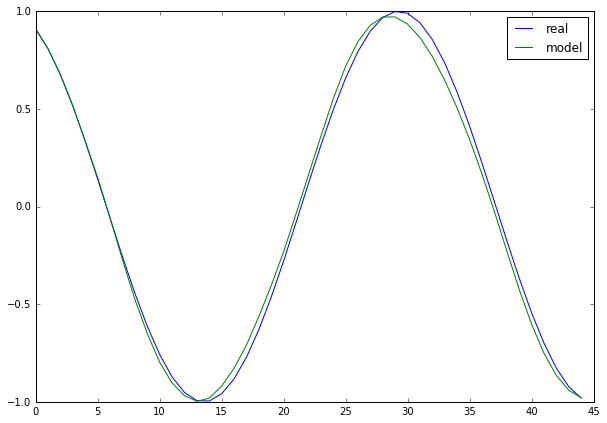

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(TSreal)
plt.plot(TSmodel)
plt.legend(['real','model'], loc='upper right')
plt.show()